#作業五：請畫出某日台灣天氣溫度的視覺化台灣地圖或某縣市地圖。
加分題：請自設視覺畫熱圖主題，畫出此主題的視覺化台灣地圖或某區域地圖。

data來源:https://www.cwb.gov.tw/V8/C/W/County/index.html

In [1]:
#下載地理資訊連結
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 6.3 MB 35.6 MB/s 
     |████████████████████████████████| 16.7 MB 40.4 MB/s 


In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(10,10)

In [3]:
town_TA = gpd.read_file('TOWN_MOI_1081121.shp', encoding='utf-8')

In [4]:
town_TA.head()

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((121.40982 23.21369, 121.40984 23.213..."
1,T21,10013210,屏東縣,佳冬鄉,Jiadong Township,T,10013,"POLYGON ((120.54846 22.46067, 120.54853 22.460..."
2,P13,10009130,雲林縣,麥寮鄉,Mailiao Township,P,10009,"POLYGON ((120.30198 23.81625, 120.30197 23.815..."
3,V11,10014110,臺東縣,綠島鄉,Ludao Township,V,10014,"MULTIPOLYGON (((121.49155 22.67746, 121.49185 ..."
4,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,"MULTIPOLYGON (((121.61180 21.94290, 121.61133 ..."


In [14]:
data=pd.read_excel('0421天氣.xlsx')

In [15]:
data.head()

,縣市,最低溫,最高溫,溫差
0,基隆市,20.0,24.0,4
1,臺北市,19.0,26.0,7
2,新北市,19.0,26.0,7
3,桃園市,18.0,25.0,7
4,新竹市,19.0,24.0,5


In [16]:
town_A_no = town_TA.merge(data, left_on=('COUNTYNAME'), right_on=('縣市'))

In [17]:
town_A_no.head()

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry,縣市,最低溫,最高溫,溫差
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((121.40982 23.21369, 121.40984 23.213...",臺東縣,21.0,27.0,6
1,V11,10014110,臺東縣,綠島鄉,Ludao Township,V,10014,"MULTIPOLYGON (((121.49155 22.67746, 121.49185 ...",臺東縣,21.0,27.0,6
2,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,"MULTIPOLYGON (((121.61180 21.94290, 121.61133 ...",臺東縣,21.0,27.0,6
3,V09,10014050,臺東縣,鹿野鄉,Luye Township,V,10014,"POLYGON ((121.19419 22.93667, 121.19392 22.936...",臺東縣,21.0,27.0,6
4,V10,10014060,臺東縣,池上鄉,Chishang Township,V,10014,"POLYGON ((121.21208 23.14418, 121.21230 23.144...",臺東縣,21.0,27.0,6


In [9]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.6/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

--2022-04-15 03:44:10--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.203.139, 172.217.203.102, 172.217.203.100, ...
Connecting to drive.google.com (drive.google.com)|172.217.203.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m7vuvr2cmcjpnph4vhheoljnh8q68t7m/1649994225000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-04-15 03:44:13--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m7vuvr2cmcjpnph4vhheoljnh8q68t7m/1649994225000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.214.132, 2607:f8b0:400c:c0b::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|173.194.2

In [10]:
myfont = FontProperties(fname=r'/content/taipei_sans_tc_beta.ttf')

Text(0.5, 1.0, '4/21全台今日最低溫度')

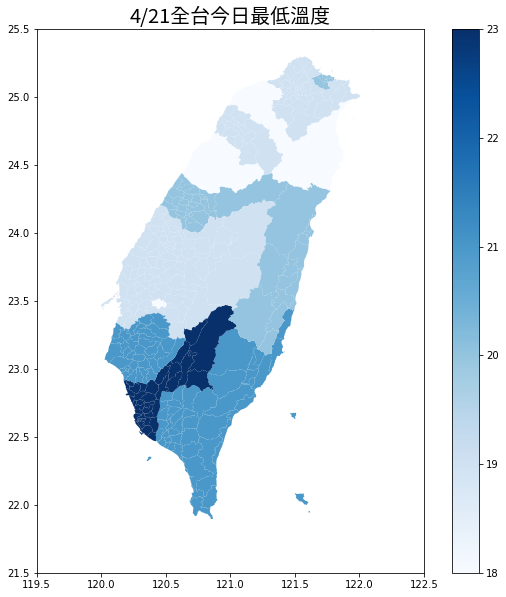

In [18]:
SA=town_A_no.plot(column='最低溫',cmap='Blues',legend=True)
SA.set_xlim(119.5, 122.5)
SA.set_ylim(21.5, 25.5)

plt.title("4/21全台今日最低溫度",fontproperties=myfont,fontsize=20)

Text(0.5, 1.0, '4/21全台今日最高溫度')

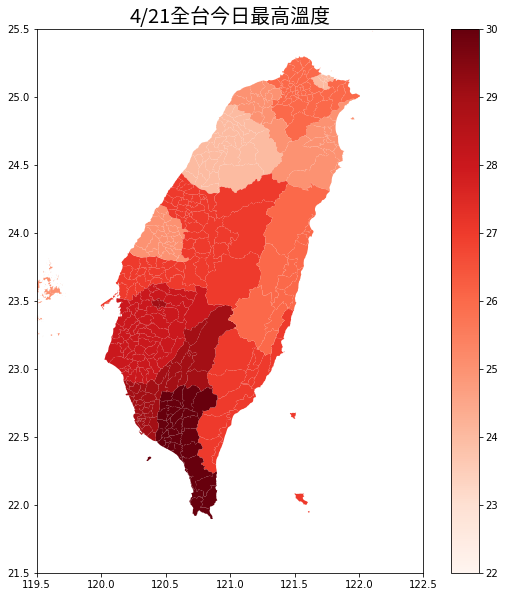

In [12]:
SA=town_A_no.plot(column='最高溫',cmap='Reds',legend=True)
SA.set_xlim(119.5, 122.5)
SA.set_ylim(21.5, 25.5)

plt.title("4/21全台今日最高溫度",fontproperties=myfont,fontsize=20)

Text(0.5, 1.0, '4/21全台今日溫差')

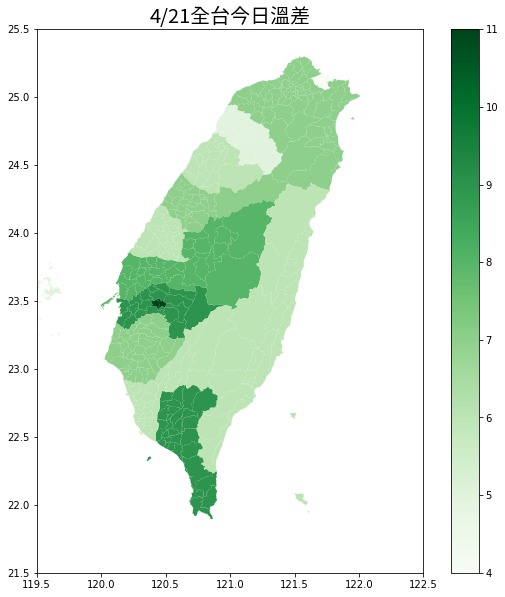

In [13]:
SA=town_A_no.plot(column='溫差',cmap='Greens',legend=True)
SA.set_xlim(119.5, 122.5)
SA.set_ylim(21.5, 25.5)

plt.title("4/21全台今日溫差",fontproperties=myfont,fontsize=20)